<center><h1>Making Merger Tree from m3p output</h1></center>

In [147]:
import numpy as np
import m3p_merger

import importlib
importlib.reload(m3p_merger)

<module 'm3p_merger' from '/usr/users/ellis/jupyterhub-gwdg/PeakPatch/m3p_merger/m3p_merger.py'>

In [2]:
# Peak patch data
pathPrefix = "/usr/users/ellis/PeakPatch/m3p/axOut/"

# Unevolved Density fields
DensPath = "/usr/users/ellis/bin/InputFiles/512"
DensSuffix = ['/L6N3_07/axion.m.00115_L6N3_07','/L6N3_06/axion.m.00115_L6N3_06','/L6N3_01/axion.m.00115_L6N3_01']

In [3]:
ppFile = pathPrefix + "../inputs/inputs.ax1"
densFile = DensPath+DensSuffix[0]

peak_list, boxsize = m3p_merger.MakePeakList(ppFile)

<h2><center>Find which trees are interesting</center></h2>

In [118]:
for i in range(452):
    out = m3p_merger.BuildMergerTree(peak_list, ppFile, i)
    if out[4].size>0:
        print(i, len(out[4]))

31 21
198 1


<h2><center>Calculate Merger Tree</center></h2>

In [151]:
peak_list, boxsize = m3p_merger.MakePeakList(ppFile)

out = m3p_merger.BuildMergerTree(peak_list, ppFile, 2)

<h2><center>Plot all peaks on each other</center></h2>

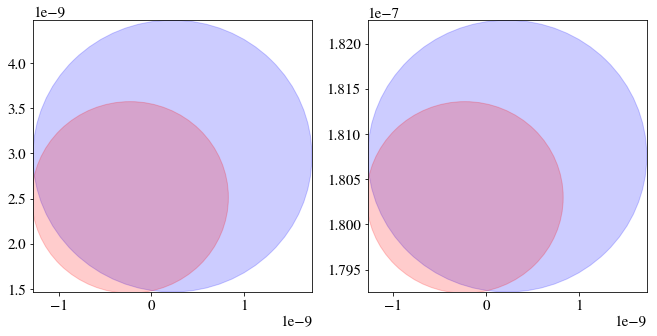

In [154]:
m3p_merger.plotMergerPatches(out, ppFile)

<h2><center>Plot merger tree</center></h2>

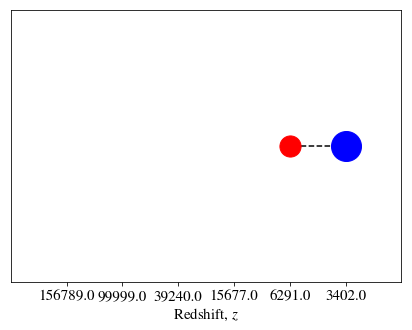

In [153]:
m3p_merger.FindCollapseRedshift()

In [156]:
def FindCollapseRedshift(merger_tree, thresh_frac, pp_file):
    p = ParamsFile(pp_file)
    redshifts = p["redshifts"]  
    
    FinalMass = merger_tree[0][0, 4]
    
    ProgMass = np.zeros(len(redshifts))
    for ri, redshifts in enumerate(redshifts):
        if merger_tree.size > 0:
            ProgMass[ri] = np.sum(merger_tree[ri][:, 4][merger_tree[ri][:, 4]>thresh_frac*FinalMass])
    
    CollapseRedshift = max(redshifts[ProgMass>FinalMass/2])
    return CollapseRedshift

In [157]:
FindCollapseRedshift(out, 0.1, ppFile)

IndexError: index 4 is out of bounds for axis 1 with size 4